In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv ( 'salaries.csv' )
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [ ]:
print(df.dtypes)
df.info()

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_loca

In [ ]:
print ( df.isnull () .sum () )

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
missing_values = df.isnull().sum()

df.dropna ( axis = 0 , inplace = True)

print ( df.isnull () .sum () )

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Intentar convertir a números
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df['work_year'] = pd.to_numeric(df['work_year'], errors='coerce')

duplicate_count = df.duplicated().sum()
duplicate_rows = df[df.duplicated()]
print("Total duplicate rows:", duplicate_count)
print("First few duplicate rows:")
print(duplicate_rows.head())

Total duplicate rows: 79532
First few duplicate rows:
    work_year experience_level employment_type job_title  salary  \
14       2025               SE              FT   Manager  230000   
15       2025               SE              FT   Manager  121000   
16       2025               SE              FT   Manager  230000   
17       2025               SE              FT   Manager  121000   
18       2025               SE              FT   Manager  230000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
14             USD         230000                 US             0   
15             USD         121000                 US             0   
16             USD         230000                 US             0   
17             USD         121000                 US             0   
18             USD         230000                 US             0   

   company_location company_size  
14               US            M  
15               US            M  
16         

In [ ]:
df.drop_duplicates(inplace=True)
df.shape
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [ ]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,US,100,US,M


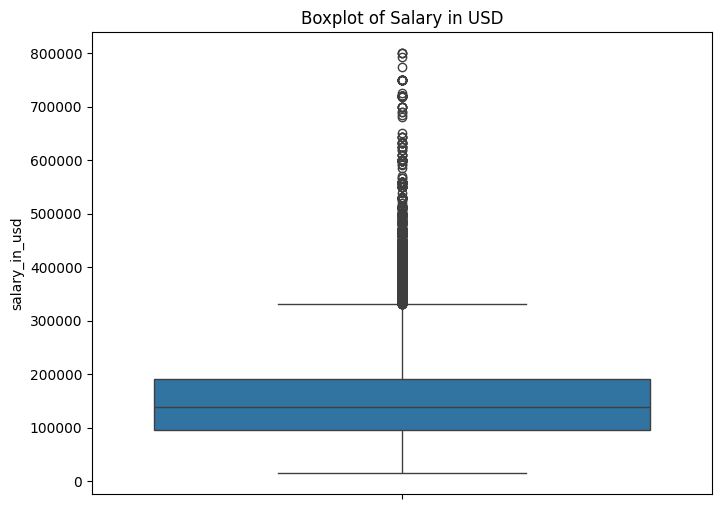

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.show()

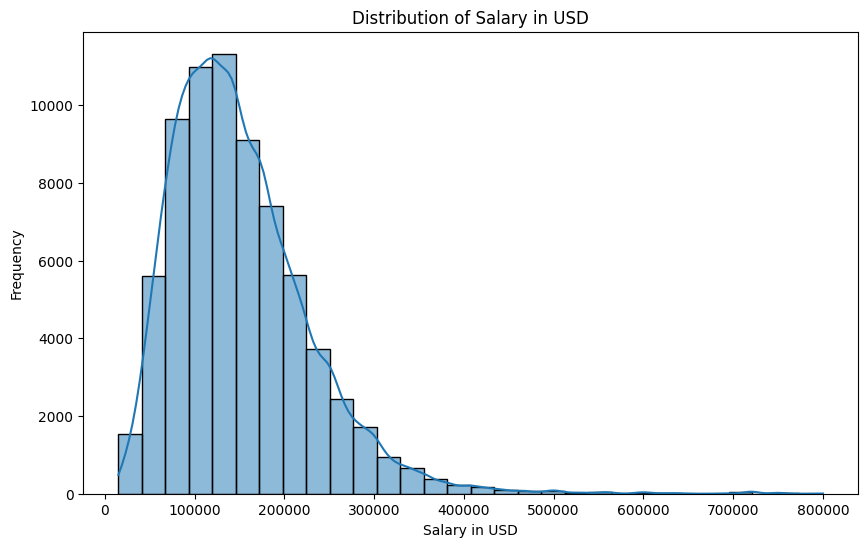

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

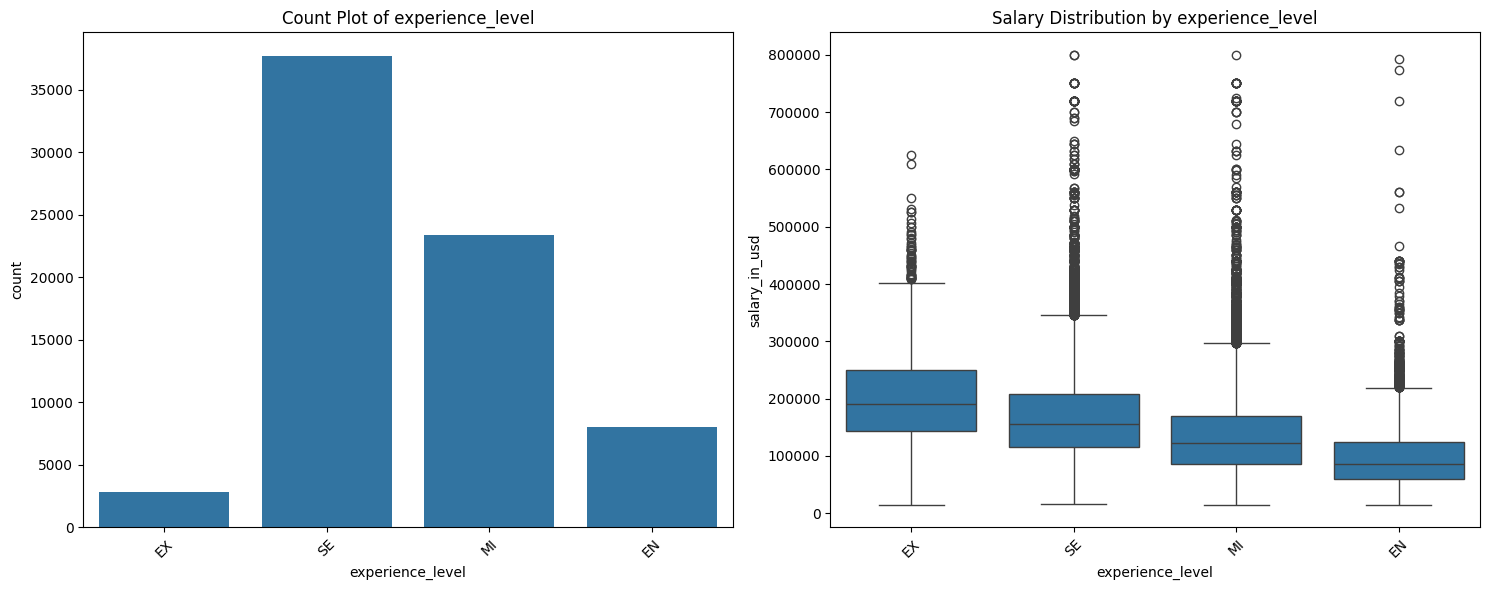

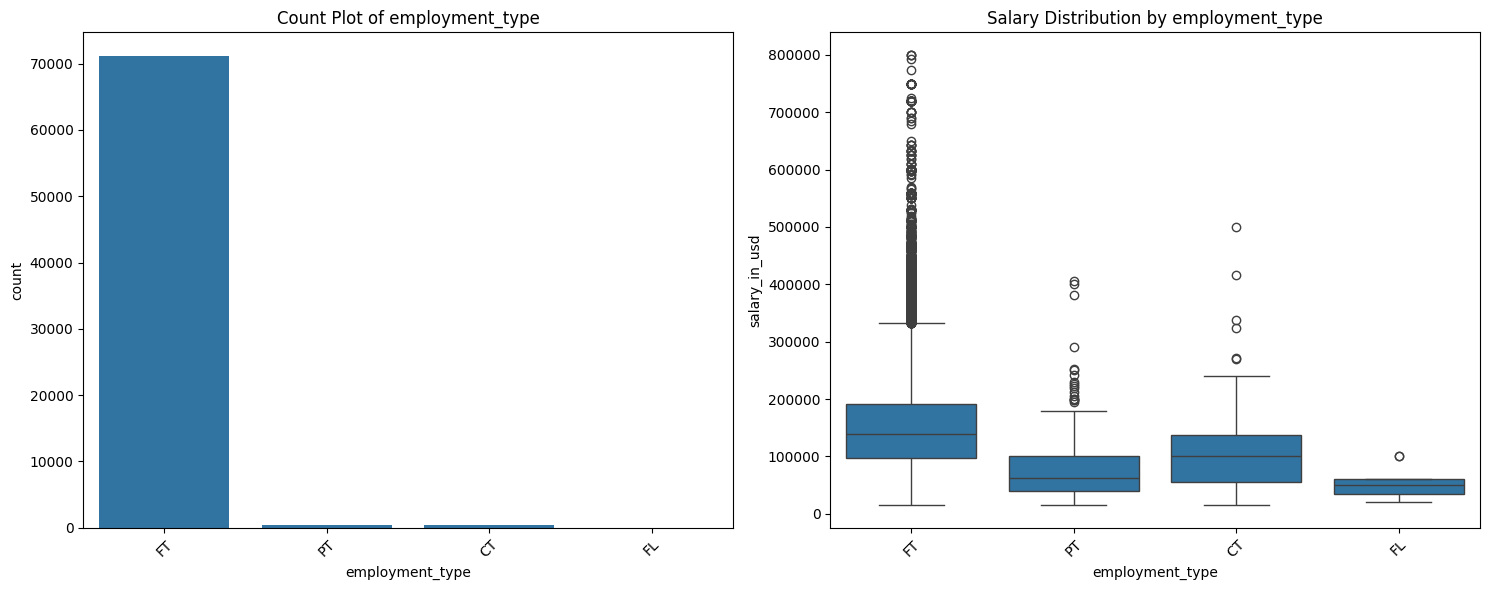

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns to plot
categorical_cols = ['experience_level', 'employment_type']

for col in categorical_cols:
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Count plot
    sns.countplot(ax=axes[0], x=df[col])
    axes[0].set_title(f'Count Plot of {col}')
    axes[0].tick_params(axis='x', rotation=45)


    # Box plot
    sns.boxplot(ax=axes[1], x=df[col], y=df['salary_in_usd'])
    axes[1].set_title(f'Salary Distribution by {col}')
    axes[1].tick_params(axis='x', rotation=45)


    # Show the plots
    plt.tight_layout()
    plt.show()

In [ ]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

Original shape: (71913, 9)
Shape after removing outliers: (70159, 9)


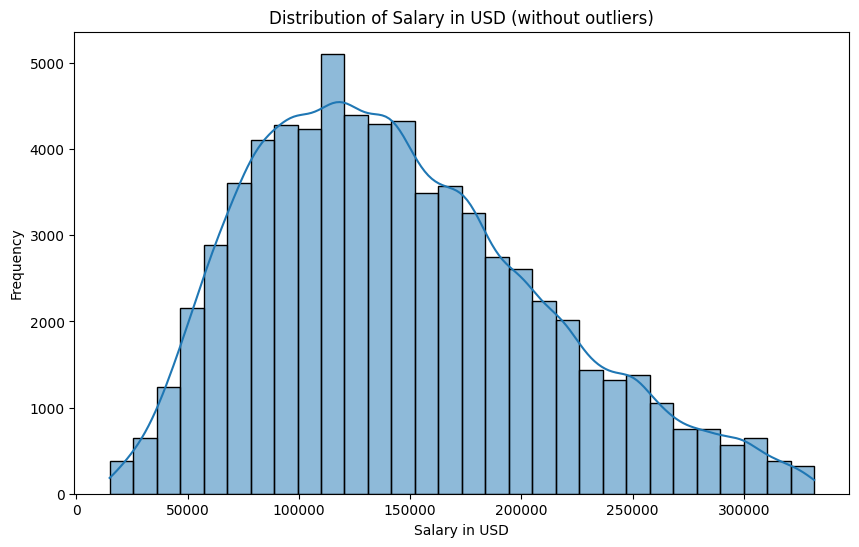

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salary in USD (without outliers)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

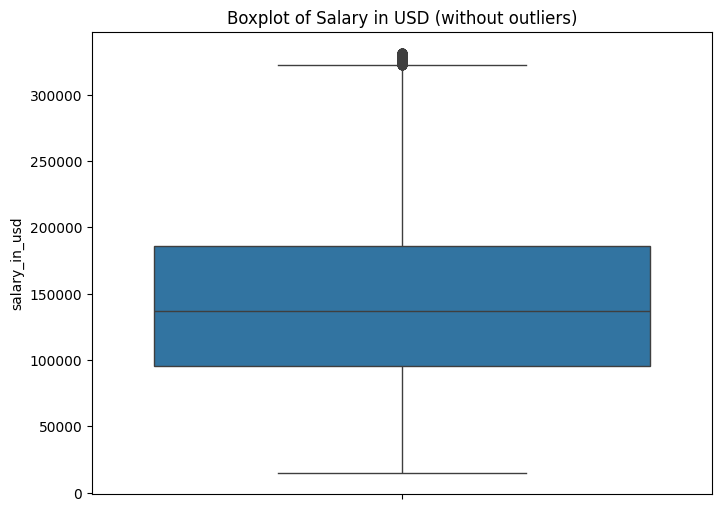

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers['salary_in_usd'])
plt.title('Boxplot of Salary in USD (without outliers)')
plt.show()

In [ ]:
# Select features (X) and target (y)
X = df_no_outliers.drop('salary_in_usd', axis=1)
y = df_no_outliers['salary_in_usd']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

display(X_encoded.head())

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Content Writer,job_title_AI Data Engineer,...,company_location_TW,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_M,company_size_S
1,2025,0,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2025,0,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2025,0,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,2025,100,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
5,2025,100,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56127, 627)
Shape of X_test: (14032, 627)
Shape of y_train: (56127,)
Shape of y_test: (14032,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2824056408.769122
R-squared (R2): 0.3341070833958527


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regressor - R-squared (R2): {r2_rf}")

Random Forest Regressor - Mean Squared Error (MSE): 2845493486.808139
Random Forest Regressor - R-squared (R2): 0.3290523690585093


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Regressor - R-squared (R2): {r2_xgb}")

XGBoost Regressor - Mean Squared Error (MSE): 2845263104.0
XGBoost Regressor - R-squared (R2): 0.3291066884994507
